In [3]:
import numpy as np
import pandas as pd


In [4]:
code = 'ISO-8859-1'

In [5]:
#Reading the data 

data = pd.read_csv('C:\\Users\\Saiftalk Server\\Desktop\\codsoft\\Task4\\sms dataset\\spam.csv'
                  ,encoding = code)
df = pd.DataFrame(data)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#Dropping the unnecessary columns

df = df.drop(columns = df.columns[2:5])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#Renaming the columns as target and text 

df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
#Converting the target column into numerical data : 0:ham and 1:spam

df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#Checking for null values

df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#Checking for duplicate values

df.duplicated().sum()

403

In [15]:
#Dropping duplicate values

df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

In [17]:
count = df['target'].value_counts()
print(count)

target
0    4516
1     653
Name: count, dtype: int64


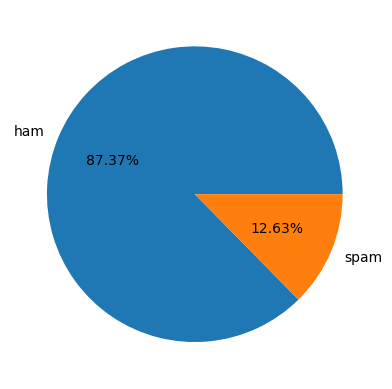

In [18]:
import matplotlib.pyplot as plt

plt.pie(count, labels=['ham', 'spam'], autopct='%0.2f%%')
plt.show()

In [19]:
import nltk 

In [20]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [21]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [22]:
#Calculating number of characters and number of words in spam and ham messages 

df['sum_characters'] = df['text'].apply(len)

In [23]:
df.head()

,target,text,sum_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,sum_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df[['sum_characters', 'num_words']].describe()

,sum_characters,num_words
count,5169.000000,5169.000000
mean,78.977945,18.455794
std,58.236293,13.324758
min,2.000000,1.000000
25%,36.000000,9.000000
50%,60.000000,15.000000
75%,117.000000,26.000000
max,910.000000,220.000000


In [27]:
# Statistical Description for ham messages

df[df['target']==0][['sum_characters','num_words']].describe()

,sum_characters,num_words
count,4516.000000,4516.000000
mean,70.459256,17.123782
std,56.358207,13.493970
min,2.000000,1.000000
25%,34.000000,8.000000
50%,52.000000,13.000000
75%,90.000000,22.000000
max,910.000000,220.000000


In [28]:
# Statistical Description for spam messages

df[df['target']==1][['sum_characters', 'num_words']].describe()

,sum_characters,num_words
count,653.000000,653.000000
mean,137.891271,27.667688
std,30.137753,7.008418
min,13.000000,2.000000
25%,132.000000,25.000000
50%,149.000000,29.000000
75%,157.000000,32.000000
max,224.000000,46.000000


In [29]:
import seaborn as sns

C:\ProgramData\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


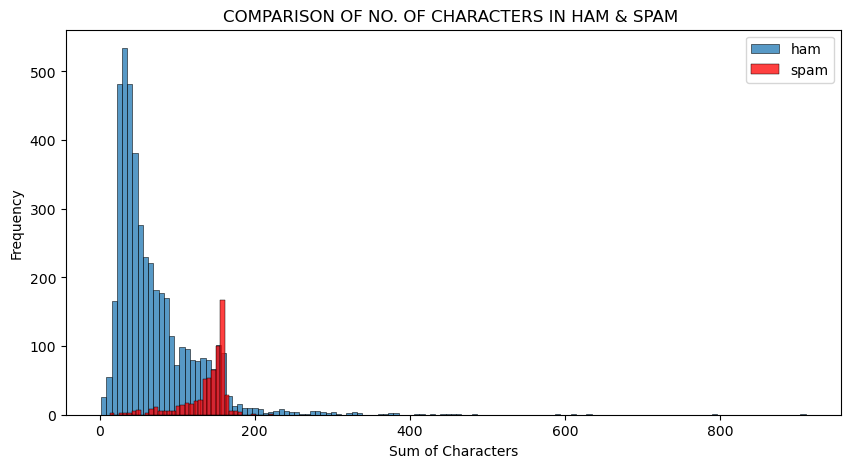

In [30]:


plt.figure(figsize = (10,5))
sns.histplot(df[df['target']==0]['sum_characters'], label = 'ham')
sns.histplot(df[df['target']==1]['sum_characters'], label = 'spam', color = 'red')

plt.xlabel('Sum of Characters')
plt.ylabel('Frequency')
plt.title('COMPARISON OF NO. OF CHARACTERS IN HAM & SPAM ')

plt.legend()
plt.show()


C:\ProgramData\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


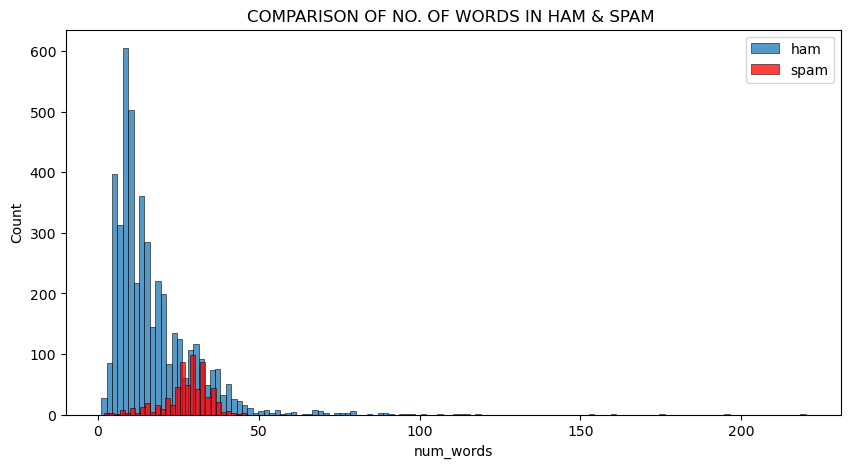

In [31]:

plt.figure(figsize = (10,5))
sns.histplot(df[df['target']==0]['num_words'], label = 'ham')
sns.histplot(df[df['target']==1]['num_words'], label = 'spam', color = 'red')


plt.title('COMPARISON OF NO. OF WORDS IN HAM & SPAM ')

plt.legend()
plt.show()

C:\ProgramData\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


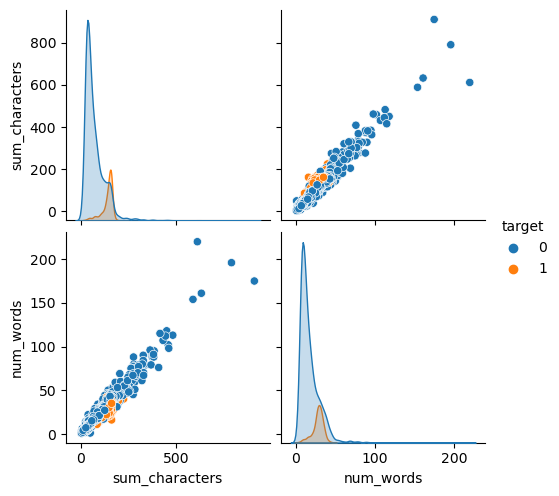

In [32]:
sns.pairplot(df, hue = 'target')

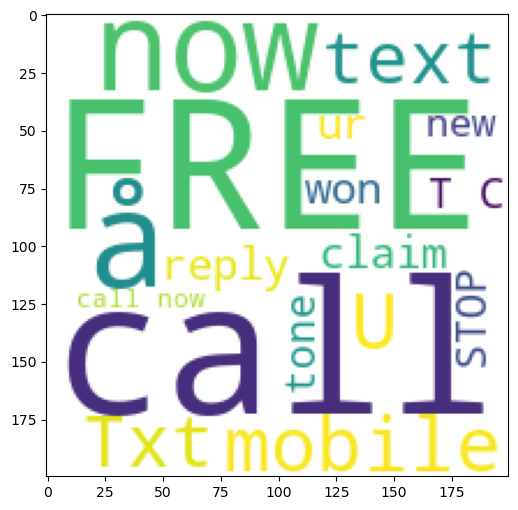

In [33]:
#Calculating frequent words in spam messages

from wordcloud import WordCloud
wc = WordCloud(width = 200, height = 200, min_font_size=10, background_color='white')




spam_wc = wc.generate(df[df['target']==1]['text'].str.cat(sep=''))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

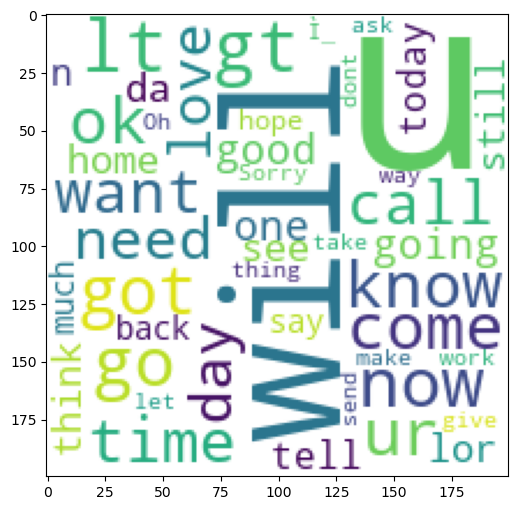

In [34]:
#Calculating frequent words in ham messages

ham_wc = wc.generate(df[df['target']==0]['text'].str.cat(sep=''))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [35]:
spam_words = []
for msg in df[df['target']==1]['text'].tolist():
    for word in msg.split():
        spam_words.append(word)

In [36]:
len(spam_words)

15464

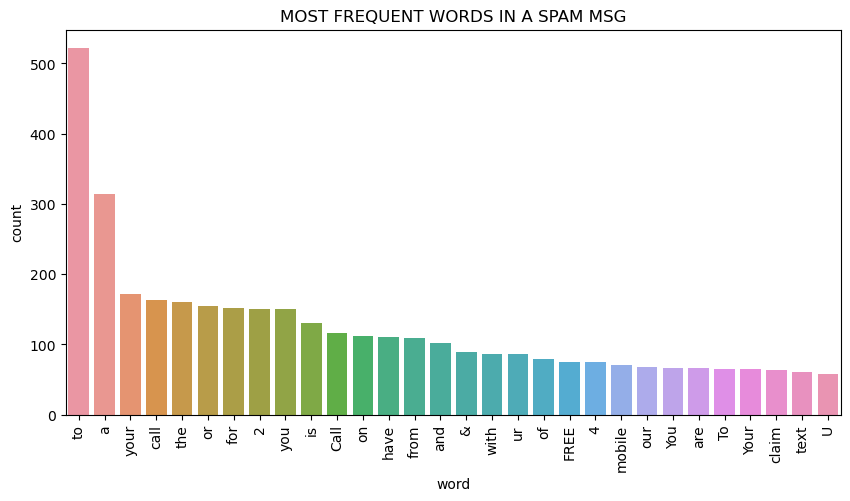

In [37]:
from collections import Counter 





spam_word_count = Counter(spam_words).most_common(30)


spam_word_count_df = pd.DataFrame(spam_word_count, columns=['word', 'count'])


plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=spam_word_count_df)
plt.xticks(rotation='vertical')
plt.title('MOST FREQUENT WORDS IN A SPAM MSG')
plt.show()

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [39]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(df.text,df.target, test_size=0.2)

In [40]:
# Import CountVectorizer from scikit-learn to convert text data into numerical data

from sklearn.feature_extraction.text import CountVectorizer
featurer = CountVectorizer()
X_train_count = featurer.fit_transform(X_train.values)

In [41]:
X_train_count

<4135x7708 sparse matrix of type '<class 'numpy.int64'>'
	with 53748 stored elements in Compressed Sparse Row format>

In [42]:
# Initialize the MultinomialNB classifier

model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [43]:
X_test_count = featurer.transform(X_test)
model.score(X_test_count, y_test)

0.9903288201160542

In [44]:
# Initialize a pipeline with a CountVectorizer and a MultinomialNB classifie

from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])


In [45]:

clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [46]:
clf.score(X_test,y_test)

0.9903288201160542

In [48]:
# Pre-trained model
prediction_model = model 
message = [
    "XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL"			
]

message_count = featurer.transform(message)
# Predict whether each sentence is spam (1) or not (0)
predictions = prediction_model.predict(message_count)

for sentence, prediction in zip(message, predictions):
    if prediction == 1:
        print(f"'{sentence}' is a spam message.")
    else:
        print(f"'{sentence}' is not a spam message.")

'XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL' is a spam message.
